In [44]:
import pathlib as pl

import nilearn as nl
from nilearn import surface
from nilearn import plotting
from nilearn.maskers import NiftiLabelsMasker

In [48]:
# fmri surface output from fmriprep

path_dir = '/home/INT/gilson.m/Neuro/projects/BraINT/derivatives/data_brainhack/'
fmri_file = pl.Path(path_dir, 'sub-010_ses-02_task-03ArchiLocalizer_hemi-L_space-fsnative_bold.func.gii')


fmri_surf = surface.load_surf_data(fmri_file)

In [49]:
# mesh of vertices

mesh_file = pl.Path(path_dir, 'sub-010_hemi-L_inflated.surf.gii')

mesh = surface.load_surf_mesh(mesh_file)

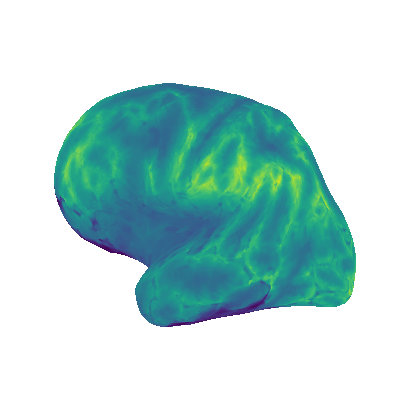

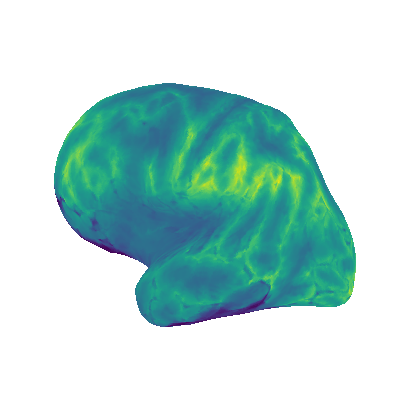

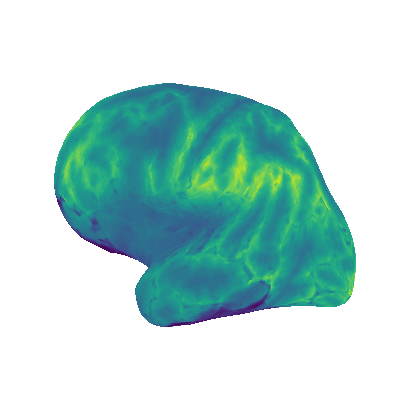

In [53]:
for t in [0,10,20]:
    plotting.plot_surf(mesh, surf_map=fmri_surf[:,t])

In [51]:
print(fmri_surf.shape)
print(mesh)

(160301, 317)
mesh(coordinates=array([[  42.08734 , -104.80349 ,  -89.43317 ],
       [  41.70706 , -104.97261 ,  -89.23589 ],
       [  41.06402 , -105.22262 ,  -88.970566],
       ...,
       [  31.02001 ,  148.24045 ,  -24.85556 ],
       [  29.00117 ,  151.8808  ,  -23.002275],
       [  30.202068,  149.98582 ,  -24.195375]], dtype=float32), faces=array([[     0,      1,      6],
       [     7,      6,      1],
       [     0,    144,      1],
       ...,
       [155880, 155878, 155879],
       [155880, 155877, 155878],
       [154850, 154852, 154851]], dtype=int32))


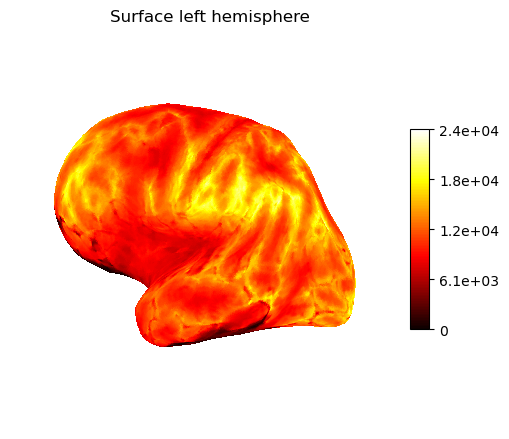

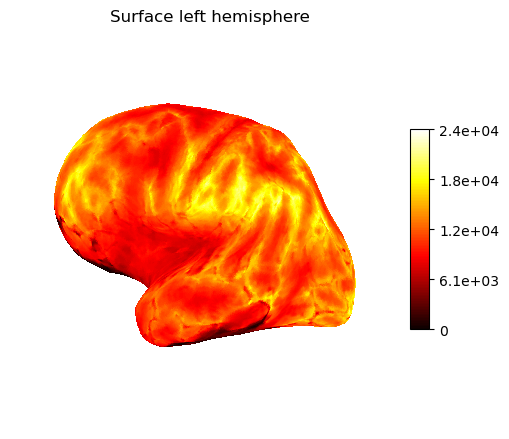

In [54]:
plotting.plot_surf_stat_map(mesh, fmri_surf[:,0], hemi='left',
                            title='Surface left hemisphere', colorbar=True,
                            threshold=1.0)

In [18]:
juelich_atlas = nilearn.datasets.fetch_atlas_juelich('prob-1mm', data_dir='./atlases/')
print(juelich_atlas.labels)


Dataset created in ./atlases/fsl



 ...done. (1 seconds, 0 min)
Extracting data from ./atlases/fsl/354ff012945205c23109517a2b252049/Juelich.tgz..... done.


['Background', 'GM Amygdala_centromedial group', 'GM Amygdala_laterobasal group', 'GM Amygdala_superficial group', 'GM Anterior intra-parietal sulcus hIP1', 'GM Anterior intra-parietal sulcus hIP2', 'GM Anterior intra-parietal sulcus hIP3', "GM Broca's area BA44", "GM Broca's area BA45", 'GM Hippocampus cornu ammonis', 'GM Hippocampus dentate gyrus', 'GM Hippocampus entorhinal cortex', 'GM Hippocampus hippocampal-amygdaloid transition area', 'GM Hippocampus subiculum', 'GM Inferior parietal lobule PF', 'GM Inferior parietal lobule PFcm', 'GM Inferior parietal lobule PFm', 'GM Inferior parietal lobule PFop', 'GM Inferior parietal lobule PFt', 'GM Inferior parietal lobule PGp', 'GM Inferior parietal lobule Pga', 'GM Insula Id1', 'GM Insula Ig1', 'GM Insula Ig2', 'GM Lateral geniculate body', 'GM Mamillary body', 'GM Medial geniculate body', 'GM Premotor cortex BA6', 'GM Primary auditory cortex TE1.0', 'GM Primary auditory cortex TE1.1', 'GM Primary auditory cortex TE1.2', 'GM Primary mot

In [19]:
harvard_atlas = nilearn.datasets.fetch_atlas_harvard_oxford('sub-prob-1mm', data_dir='./atlases/')
print(harvard_atlas.labels)

Downloaded 8249344 of 25716861 bytes (32.1%,    2.1s remaining) ...done. (3 seconds, 0 min)
Extracting data from ./atlases/fsl/e368442344b829406e70f7e3dee6d99a/HarvardOxford.tgz..... done.


['Background', 'Left Cerebral White Matter', 'Left Cerebral Cortex ', 'Left Lateral Ventrical', 'Left Thalamus', 'Left Caudate', 'Left Putamen', 'Left Pallidum', 'Brain-Stem', 'Left Hippocampus', 'Left Amygdala', 'Left Accumbens', 'Right Cerebral White Matter', 'Right Cerebral Cortex ', 'Right Lateral Ventricle', 'Right Thalamus', 'Right Caudate', 'Right Putamen', 'Right Pallidum', 'Right Hippocampus', 'Right Amygdala', 'Right Accumbens']


In [ ]:


masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(fmri_filenames, confounds=reduced_confounds)